<a href="https://colab.research.google.com/github/Govind-P/Sparks/blob/main/Percentage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

READ DATA

In [5]:
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting score

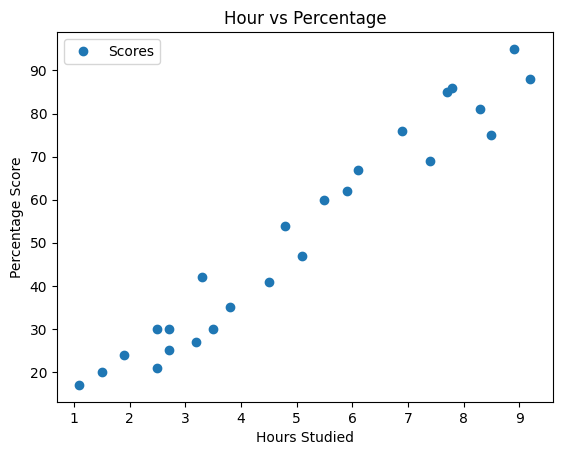

In [9]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hour vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Define Target Variable (y) and Feature Variables (X)

In [11]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Plotting Regression Line

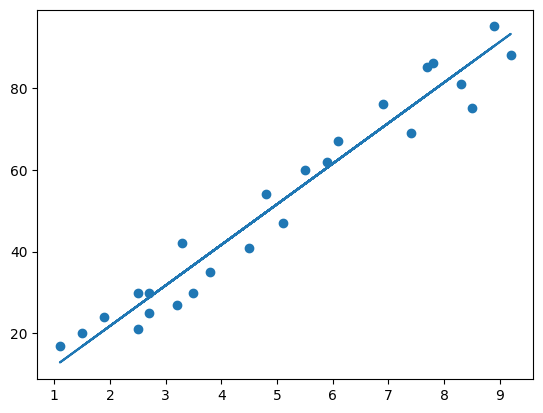

In [15]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Predict

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
data_p = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data_p

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluate Model

In [21]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
mean_absolute_error(y_test,y_pred)

4.183859899002982

In [24]:
perc=mean_absolute_percentage_error(y_test,y_pred)
perc

0.12568891617045685

In [23]:
r2_score(y_test,y_pred)

0.9454906892105354

In [27]:
print("Accuracy = ",100-(perc*100))

Accuracy =  87.4311083829543


Model provides an accuracy of 87.4311083829543 which is medium to high level accuracy.